# <h1><center>Classification of the store size based on the category <h1><center>

In [173]:
import pandas as pd
import numpy as np
import plotly
from plotly import __version__#
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

In [174]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
store_df = pd.read_csv('stores.csv')
train_df.head(10)
features_df.head(10)
store_df.head(10)
test_df = pd.read_csv('test.csv')

In [177]:
train_df[train_df['Weekly_Sales']<0].count()

Store           1285
Dept            1285
Date            1285
Weekly_Sales    1285
IsHoliday       1285
dtype: int64

In [89]:
test_df=test_df.merge(store_df,on=['Store'])


In [93]:
test_df.drop(['Type'],axis=1,inplace=True)


In [169]:
test_dat=test_df.drop(['Dept','Date','IsHoliday'],axis=1)

In [4]:
A_count=store_df[store_df['Type']=='A'].count()
B_count=store_df[store_df['Type']=='B'].count()
C_count=store_df[store_df['Type']=='C'].count()
print(A_count,B_count,C_count)

Store    22
Type     22
Size     22
dtype: int64 Store    17
Type     17
Size     17
dtype: int64 Store    6
Type     6
Size     6
dtype: int64


In [27]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


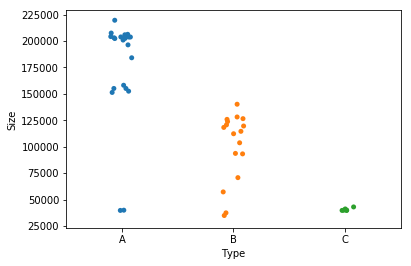

In [5]:
sns.stripplot(x="Type", y="Size", data=store_df, jitter=True)

In [149]:
class_train=pd.DataFrame()
labels=pd.DataFrame()
class_train=store_df[(store_df['Type']=='A')& (store_df['Size']>=40000)]
class_train
class_train=class_train.append(store_df[(store_df['Type']=='B')& (store_df['Size']>=40000)])
class_train=class_train.append(store_df[store_df['Type']=='C'])
class_train
labels=pd.Categorical(class_train['Type']).codes
labels
features=class_train.drop(['Type','Store'],axis=1)


In [152]:
clf = svm.SVC(C=100,kernel='rbf')
clf.fit(features, labels)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [168]:
test_dat=test_df.drop(['Dept','Date','IsHoliday','Store'],axis=1)

In [154]:
result=clf.predict(test_dat)

In [172]:
test_dat['Type']=result
test_dat[test_dat['Type']==2]

,Store,Size,Type
78067,30,42988,2
78068,30,42988,2
78069,30,42988,2
78070,30,42988,2
78071,30,42988,2
78072,30,42988,2
78073,30,42988,2
78074,30,42988,2
78075,30,42988,2
78076,30,42988,2


In [56]:
store_df['code'] = pd.Categorical(store_df['Type']).codes
labels=store_df['code']
store_df.drop(['code','Type'],axis=1,inplace=True)

In [57]:
store_df.drop(['Store'],axis=1,inplace=True)

In [58]:
test_dat=test_df.drop(['Dept','Date','IsHoliday'],axis=1)

In [59]:

X_train, X_test, y_train, y_test = train_test_split(store_df, labels, test_size=0.90, random_state=42)
clf = svm.SVC(kernel='linear',C=100)
clf.fit(store_df, labels)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [60]:
pred=clf.predict(test_dat.head(20000))
np.sum(pred)


40000

39    0
25    0
26    0
43    0
35    2
41    0
4     0
12    0
8     0
3     0
6     0
24    0
32    2
19    0
17    0
13    0
42    0
15    0
9     0
16    0
37    0
31    0
27    0
0     0
30    0
29    0
5     0
11    0
33    0
1     0
40    0
21    0
2     0
34    0
23    0
36    0
10    0
22    0
18    0
44    0
20    0
Name: code, dtype: int8


,Store,Type,Size,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
286548,30,C,42988,1,2010-02-05,10158.77,False,39.05,2.572,210.752605,8.324
286549,30,C,42988,2,2010-02-05,12745.86,False,39.05,2.572,210.752605,8.324
286550,30,C,42988,3,2010-02-05,1052.98,False,39.05,2.572,210.752605,8.324
286551,30,C,42988,4,2010-02-05,14058.94,False,39.05,2.572,210.752605,8.324
286552,30,C,42988,5,2010-02-05,318.00,False,39.05,2.572,210.752605,8.324
286553,30,C,42988,6,2010-02-05,4.64,False,39.05,2.572,210.752605,8.324
286554,30,C,42988,7,2010-02-05,434.84,False,39.05,2.572,210.752605,8.324
286555,30,C,42988,8,2010-02-05,13333.96,False,39.05,2.572,210.752605,8.324
286556,30,C,42988,9,2010-02-05,28.13,False,39.05,2.572,210.752605,8.324
286557,30,C,42988,10,2010-02-05,178.33,False,39.05,2.572,210.752605,8.324
